In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# teen pregnancy data from the CDC
# https://www.cdc.gov/nchs/data-visualization/teen-births/index.htm
teen_births = pd.read_csv('teen_birth_rate.csv')

# determining number of entries (rows) per year: 52
teen_births.head(52)

,Year,State,Age Group (Years),State Rate,State Births,U.S. Births,U.S. Birth Rate,Unit
0,1990,Alabama,15-17 years,47.4,"4,222","183,327",37.5,"per 1,000"
1,1990,Alaska,15-17 years,31.2,335,"183,327",37.5,"per 1,000"
2,1990,Arizona,15-17 years,47.7,"3,436","183,327",37.5,"per 1,000"
3,1990,Arkansas,15-17 years,50.4,"2,549","183,327",37.5,"per 1,000"
4,1990,California,15-17 years,44.6,"24,880","183,327",37.5,"per 1,000"
5,1990,Colorado,15-17 years,33.1,"2,061","183,327",37.5,"per 1,000"
6,1990,Connecticut,15-17 years,26.4,"1,519","183,327",37.5,"per 1,000"
7,1990,Delaware,15-17 years,38.4,462,"183,327",37.5,"per 1,000"
8,1990,District of Columbia,15-17 years,88.4,841,"183,327",37.5,"per 1,000"
9,1990,Florida,15-17 years,44.9,"9,918","183,327",37.5,"per 1,000"


In [96]:
# need to do some cleanup: figuring out how many catagories there are to work with

teen_births['Age Group (Years)'].unique()

array(['15-17 years', '15-19 years', '18-19 years'], dtype=object)

In [4]:
# separating by age group

# age 15-17
age_15_17 = teen_births.copy()
age_15_17 = age_15_17[age_15_17['Age Group (Years)'] == '15-17 years']

# just last 10 years
age_15_17 = age_15_17.tail(520)

# age 15-19
age_15_19 = teen_births.copy()
age_15_19 = age_15_19[age_15_19['Age Group (Years)'] == '15-19 years']

# just last 10 years
age_15_19 = age_15_19.tail(520)

# age 18-19
age_18_19 = teen_births.copy()
age_18_19 = age_18_19[age_18_19['Age Group (Years)'] == '18-19 years']

# just last 10 years
age_18_19 = age_18_19.tail(520)

In [5]:
# saving cleaned data to .csv

age_15_17.to_csv('teen_births_age_15_17.csv')
age_15_19.to_csv('teen_births_age_15_19.csv')
age_18_19.to_csv('teen_births_age_18_19.csv')

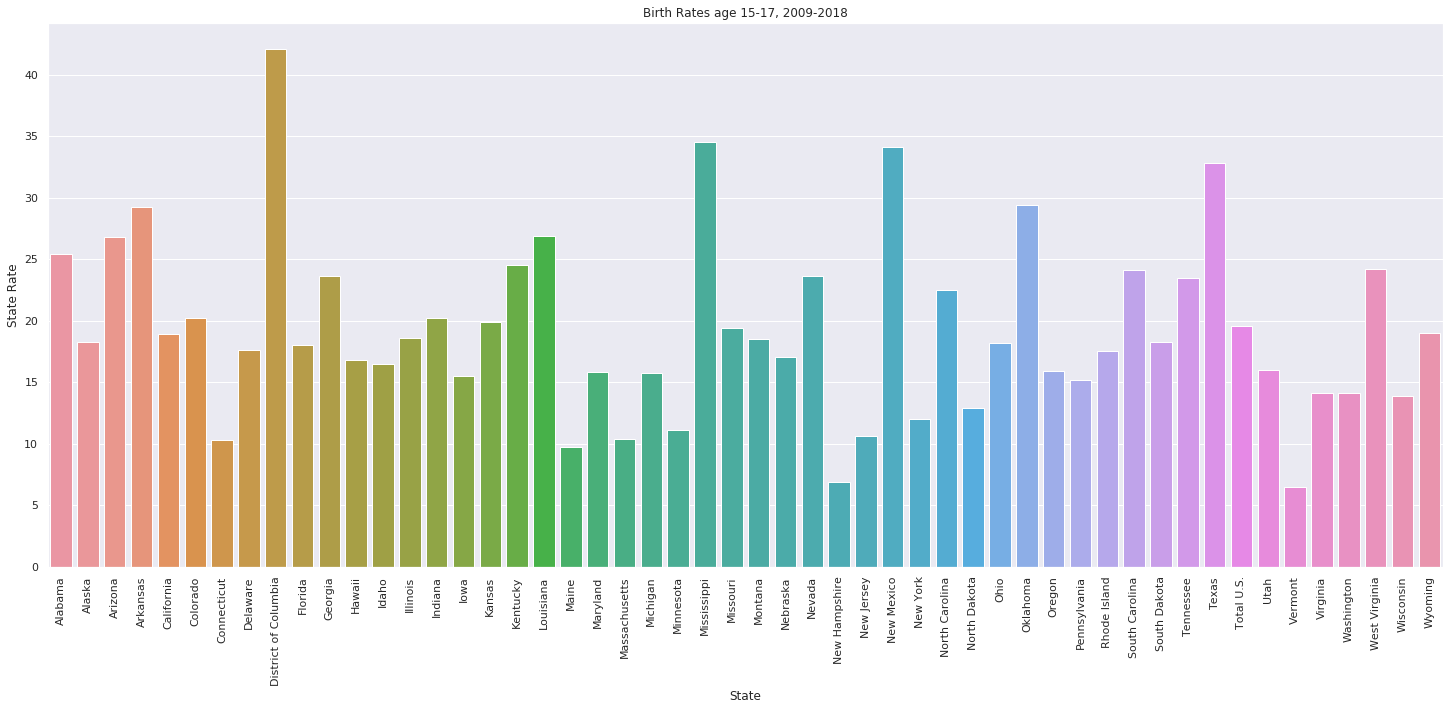

In [98]:
# trends in the 15-17 age group, by state

plt.figure(figsize = (25,10))
plt.xticks(rotation = 'vertical')
ax = sns.barplot(data = age_15_17.head(52), x = 'State', y = 'State Rate').set_title('Birth Rates age 15-17, 2009-2018')


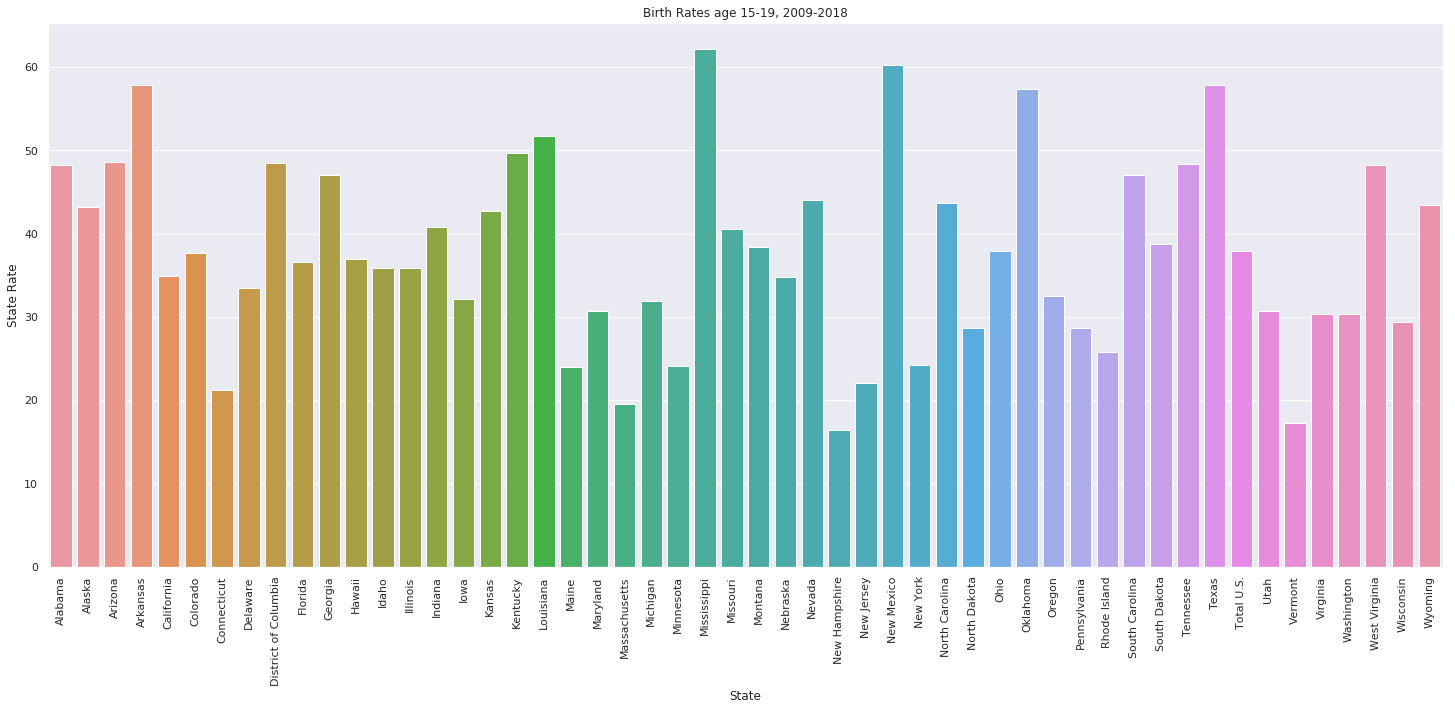

In [99]:
# trends in the 15-19 age group, by state

plt.figure(figsize = (25,10))
plt.xticks(rotation = 'vertical')
ax = sns.barplot(data = age_15_19.head(52), x = 'State', y = 'State Rate').set_title('Birth Rates age 15-19, 2009-2018')


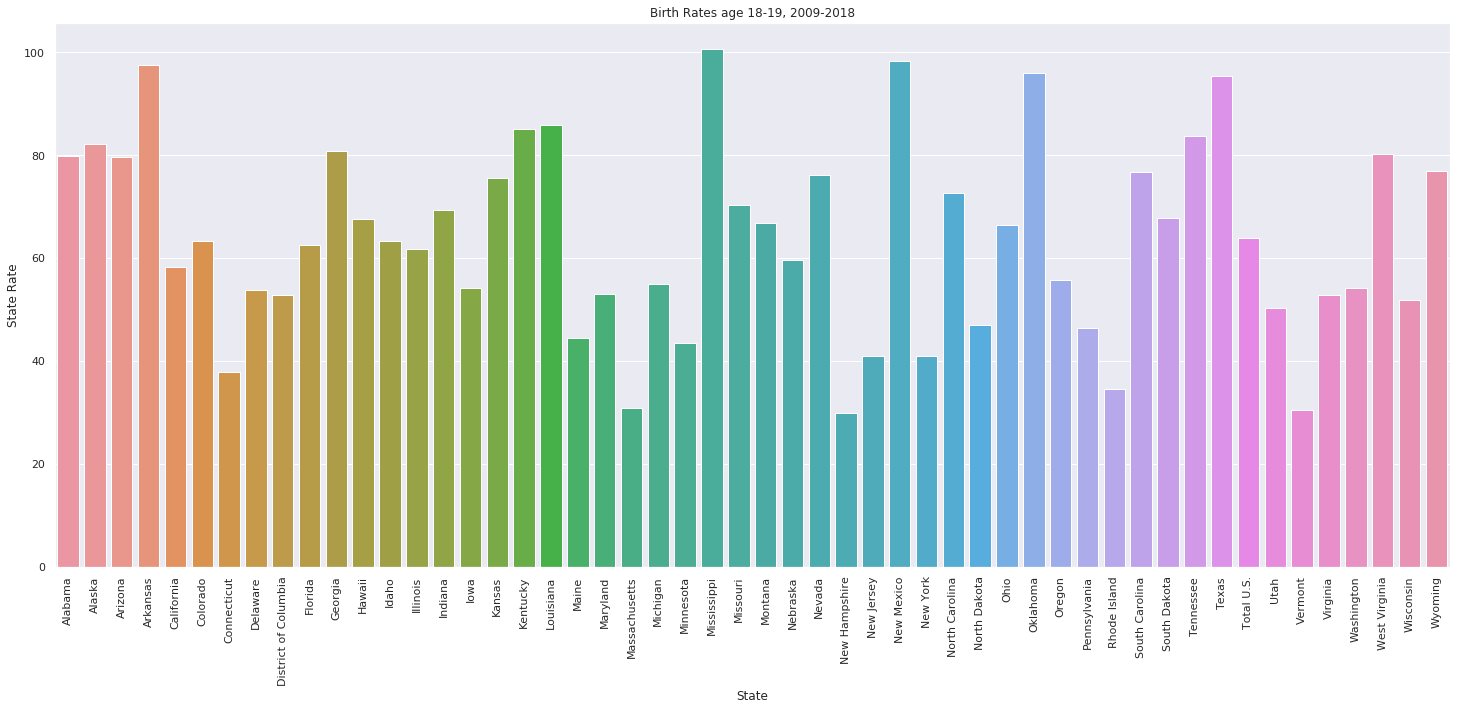

In [100]:
# trends in the 18-19 age group, by state

plt.figure(figsize = (25,10))
plt.xticks(rotation = 'vertical')
ax = sns.barplot(data = age_18_19.head(52), x = 'State', y = 'State Rate').set_title('Birth Rates age 18-19, 2009-2018')


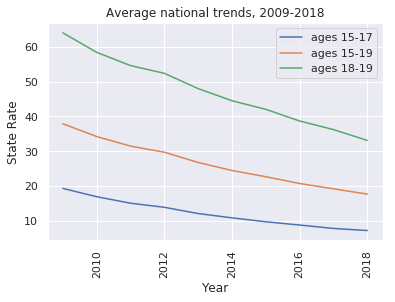

In [131]:
# national trends, by age group (taking average of state rate per year)
natl_age_15_17 = age_15_17.groupby(['Year']).mean().reset_index()
natl_age_15_19 = age_15_19.groupby(['Year']).mean().reset_index()
natl_age_18_19 = age_18_19.groupby(['Year']).mean().reset_index()

fig, ax = plt.subplots()
plt.xticks(rotation = 'vertical')
sns.lineplot(data = natl_age_15_17, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-17').set_title('Average national trends, 2009-2018')
sns.lineplot(data = natl_age_15_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-19').set_title('Average national trends, 2009-2018')
sns.lineplot(data = natl_age_18_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 18-19').set_title('Average national trends, 2009-2018')
ax.legend()

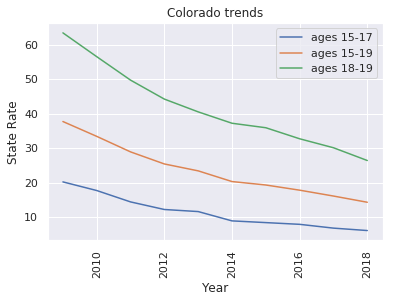

In [122]:
# example of state analysis

# extracting Colorado data for each age group
CO_age_15_17 = age_15_17.copy()
CO_age_15_17 = CO_age_15_17[CO_age_15_17['State'] == 'Colorado']

CO_age_15_19 = age_15_19.copy()
CO_age_15_19 = CO_age_15_19[CO_age_15_19['State'] == 'Colorado']

CO_age_18_19 = age_18_19.copy()
CO_age_18_19 = CO_age_18_19[CO_age_18_19['State'] == 'Colorado']

fig, ax = plt.subplots()
plt.xticks(rotation = 'vertical')
sns.lineplot(data = CO_age_15_17, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-17').set_title('Colorado trends, 2009-2018')
sns.lineplot(data = CO_age_15_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-19').set_title('Colorado trends, 2009-2018')
sns.lineplot(data = CO_age_18_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 18-19').set_title('Colorado trends, 2009-2018')
ax.legend()

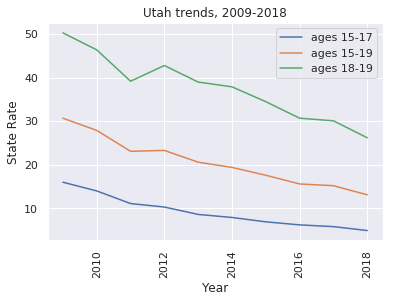

In [125]:
# example of state analysis

# extracting Utah data for each age group
UT_age_15_17 = age_15_17.copy()
UT_age_15_17 = UT_age_15_17[UT_age_15_17['State'] == 'Utah']

UT_age_15_19 = age_15_19.copy()
UT_age_15_19 = UT_age_15_19[UT_age_15_19['State'] == 'Utah']

UT_age_18_19 = age_18_19.copy()
UT_age_18_19 = UT_age_18_19[UT_age_18_19['State'] == 'Utah']

fig, ax = plt.subplots()
plt.xticks(rotation = 'vertical')
sns.lineplot(data = UT_age_15_17, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-17').set_title('Utah trends, 2009-2018')
sns.lineplot(data = UT_age_15_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-19').set_title('Utah trends, 2009-2018')
sns.lineplot(data = UT_age_18_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 18-19').set_title('Utah trends, 2009-2018')
ax.legend()

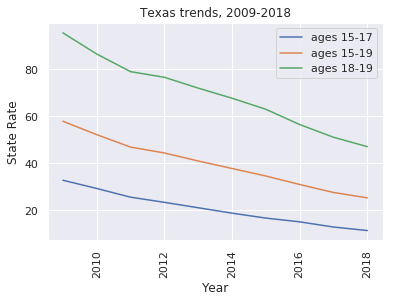

In [130]:
# example of state analysis

# extracting Texas data for each age group
TX_age_15_17 = age_15_17.copy()
TX_age_15_17 = TX_age_15_17[TX_age_15_17['State'] == 'Texas']

TX_age_15_19 = age_15_19.copy()
TX_age_15_19 = TX_age_15_19[TX_age_15_19['State'] == 'Texas']

TX_age_18_19 = age_18_19.copy()
TX_age_18_19 = TX_age_18_19[TX_age_18_19['State'] == 'Texas']

fig, ax = plt.subplots()
plt.xticks(rotation = 'vertical')
sns.lineplot(data = TX_age_15_17, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-17').set_title('Texas trends, 2009-2018')
sns.lineplot(data = TX_age_15_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-19').set_title('Texas trends, 2009-2018')
sns.lineplot(data = TX_age_18_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 18-19').set_title('Texas trends, 2009-2018')
ax.legend()

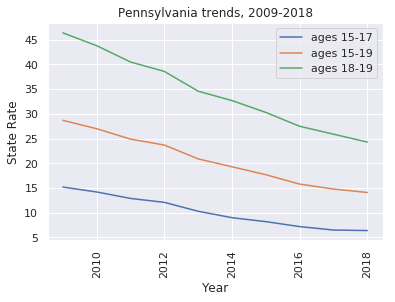

In [127]:
# example of state analysis

# extracting Pennsylvania data for each age group
PA_age_15_17 = age_15_17.copy()
PA_age_15_17 = PA_age_15_17[PA_age_15_17['State'] == 'Pennsylvania']

PA_age_15_19 = age_15_19.copy()
PA_age_15_19 = PA_age_15_19[PA_age_15_19['State'] == 'Pennsylvania']

PA_age_18_19 = age_18_19.copy()
PA_age_18_19 = PA_age_18_19[PA_age_18_19['State'] == 'Pennsylvania']

fig, ax = plt.subplots()
plt.xticks(rotation = 'vertical')
sns.lineplot(data = PA_age_15_17, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-17').set_title('Pennsylvania trends, 2009-2018')
sns.lineplot(data = PA_age_15_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-19').set_title('Pennsylvania trends, 2009-2018')
sns.lineplot(data = PA_age_18_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 18-19').set_title('Pennsylvania trends, 2009-2018')
ax.legend()

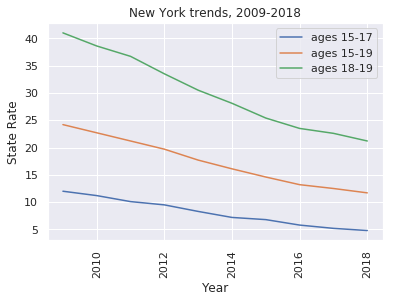

In [128]:
# example of state analysis

# extracting New York data for each age group
NY_age_15_17 = age_15_17.copy()
NY_age_15_17 = NY_age_15_17[NY_age_15_17['State'] == 'New York']

NY_age_15_19 = age_15_19.copy()
NY_age_15_19 = NY_age_15_19[NY_age_15_19['State'] == 'New York']

NY_age_18_19 = age_18_19.copy()
NY_age_18_19 = NY_age_18_19[NY_age_18_19['State'] == 'New York']

fig, ax = plt.subplots()
plt.xticks(rotation = 'vertical')
sns.lineplot(data = NY_age_15_17, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-17').set_title('New York trends, 2009-2018')
sns.lineplot(data = NY_age_15_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-19').set_title('New York trends, 2009-2018')
sns.lineplot(data = NY_age_18_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 18-19').set_title('New York trends, 2009-2018')
ax.legend()

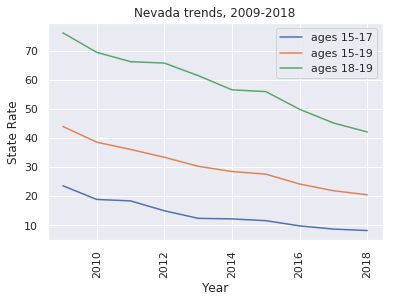

In [129]:
# example of state analysis

# extracting Nevada data for each age group
NV_age_15_17 = age_15_17.copy()
NV_age_15_17 = NV_age_15_17[NV_age_15_17['State'] == 'Nevada']

NV_age_15_19 = age_15_19.copy()
NV_age_15_19 = NV_age_15_19[NV_age_15_19['State'] == 'Nevada']

NV_age_18_19 = age_18_19.copy()
NV_age_18_19 = NV_age_18_19[NV_age_18_19['State'] == 'Nevada']

fig, ax = plt.subplots()
plt.xticks(rotation = 'vertical')
sns.lineplot(data = NV_age_15_17, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-17').set_title('Nevada trends, 2009-2018')
sns.lineplot(data = NV_age_15_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 15-19').set_title('Nevada trends, 2009-2018')
sns.lineplot(data = NV_age_18_19, x = 'Year', y = 'State Rate', ci = None, ax = ax, label = 'ages 18-19').set_title('Nevada trends, 2009-2018')
ax.legend()